In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving teleCust.csv to teleCust (1).csv


In [ ]:
df = pd.read_csv("teleCust.csv")
df.head(10)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab482f4910>,
      dtype=object)

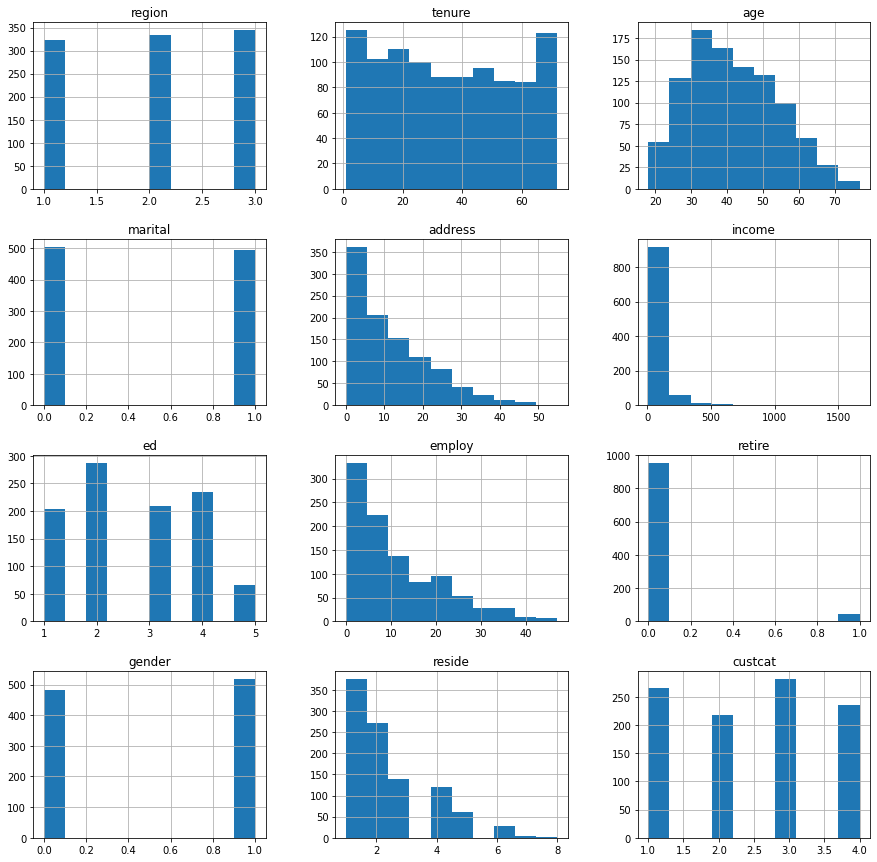

In [ ]:
df.hist(figsize = (15,15))

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [ ]:
X = df[['region', 'age', 'income', 'employ','retire', 'gender', ]] .values
X[0:5]

array([[  2.,  44.,  64.,   5.,   0.,   0.],
       [  3.,  33., 136.,   5.,   0.,   0.],
       [  3.,  52., 116.,  29.,   0.,   1.],
       [  2.,  33.,  33.,   0.,   0.,   1.],
       [  2.,  30.,  30.,   2.,   0.,   0.]])

In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767,  0.18450456, -0.12650641, -0.5941226 , -0.22207644,
        -1.03459817],
       [ 1.19883553, -0.69181243,  0.54644972, -0.5941226 , -0.22207644,
        -1.03459817],
       [ 1.19883553,  0.82182601,  0.35951747,  1.78752803, -0.22207644,
         0.96655883],
       [-0.02696767, -0.69181243, -0.41625141, -1.09029981, -0.22207644,
         0.96655883],
       [-0.02696767, -0.93080797, -0.44429125, -0.89182893, -0.22207644,
        -1.03459817]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 6) (800,)
Test set: (200, 6) (200,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 4
knn = KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors = k).fit(X_train,y_train)
print(knn)

T = knn.predict(X_test)
T[0:5]

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, T))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
Train set Accuracy:  0.55125
Test set Accuracy:  0.305


In [ ]:
help(KNeighborsClassifier)
#pca, factor analysis, corr matrix

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse o